In [1]:
#1. 数据清洗：预处理 重复值、缺失值、格式调整
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei']#设置中文显示

In [10]:
data = pd.read_csv('D:/桌面/资料/物流行业数据分析/data_wuliu.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1159 non-null   object 
 1   订单行     1161 non-null   int64  
 2   销售时间    1161 non-null   object 
 3   交货时间    1161 non-null   object 
 4   货品交货状况  1159 non-null   object 
 5   货品      1161 non-null   object 
 6   货品用户反馈  1161 non-null   object 
 7   销售区域    1161 non-null   object 
 8   数量      1157 non-null   float64
 9   销售金额    1161 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 90.8+ KB


In [11]:
#删除重复记录
data.drop_duplicates(keep='first',inplace=True)

#删除缺失值（删除带有na的整行数据,axis=0,how='any'也是默认值)
data.dropna(axis=0,how='any',inplace=True)

#删除订单行

data.drop(columns=['订单行'],inplace=True,axis=1)

#更新索引(drop=True:把原来的索引index列删除，重置index)
data.reset_index(drop=True,inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1137 non-null   object 
 1   销售时间    1137 non-null   object 
 2   交货时间    1137 non-null   object 
 3   货品交货状况  1137 non-null   object 
 4   货品      1137 non-null   object 
 5   货品用户反馈  1137 non-null   object 
 6   销售区域    1137 non-null   object 
 7   数量      1137 non-null   float64
 8   销售金额    1137 non-null   object 
dtypes: float64(1), object(8)
memory usage: 80.1+ KB
None


In [15]:
#取出销售金额列，对每一个数据进行清洗
#编写自定义过滤函数：删除逗号，转成float，如果是万元，则乘以10000，否则，删除元。
def data_deal(number):
    if number.find('万元') != -1:#找到带有万元的，取出数字，去除逗号，转成float，同时*10000
        number_new = float(number[:number.find('万元')].replace(',',''))*10000
        pass
    else: #找到带有元的，删除元，删除逗号，转成float
        number_new= float(number.replace('元','').replace(',','')) 
        pass
    return number_new

data['销售金额'] = data['销售金额'].map(data_deal)
data

,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,105275.0
1,P096826,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000.0
2,P097435,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,685877.0
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,12958.0
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,3239.0
...,...,...,...,...,...,...,...,...,...
1132,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,20041.0
1133,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,7944.0
1134,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,19408.0
1135,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,3218.0


In [16]:
data.describe()

,数量,销售金额
count,1137.000000,1.137000e+03
mean,76.655673,1.226091e+05
std,591.709671,1.118837e+06
min,1.000000,0.000000e+00
25%,1.000000,2.940000e+03
50%,1.000000,9.402000e+03
75%,4.000000,3.577300e+04
max,11500.000000,3.270000e+07


In [17]:
#1.销售金额=0，采用删除，因为数据量很小
data = data[data['销售金额']!=0]
data.describe()
#2.销售金额和数量存在严重右偏现象，在电商领域2/8很正常，无需处理

,数量,销售金额
count,1136.000000,1.136000e+03
mean,76.722271,1.227170e+05
std,591.966016,1.119324e+06
min,1.000000,5.100000e+01
25%,1.000000,2.944500e+03
50%,1.000000,9.434500e+03
75%,4.000000,3.579150e+04
max,11500.000000,3.270000e+07


In [18]:
#数据规整:增加辅助列【月】
data['销售时间'] = pd.to_datetime(data['销售时间'])
data['月份'] = data['销售时间'].apply(lambda x : x.month)
data.head()

D:\temp\ipykernel_16116\1674950451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['销售时间'] = pd.to_datetime(data['销售时间'])
D:\temp\ipykernel_16116\1674950451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['月份'] = data['销售时间'].apply(lambda x : x.month)


,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额,月份
0,P096311,2016-07-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,105275.0,7
1,P096826,2016-08-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000.0,8
2,P097435,2016-07-30,2016-9-30,按时交货,货品1,返修,华南,2.0,685877.0,7
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,12958.0,11
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,3239.0,11


In [21]:
#1.配送服务是否出现问题
#（1）月份维度
data['货品交货状况'] = data['货品交货状况'].str.strip()#去除前后空格
data1= data.groupby(['月份','货品交货状况']).size().unstack()#多维度分组，并对分组后的情况进行size数量统计,unstack非压缩显示
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
data1
#从按时交货率看，第四季度低于第三季度，可能原因有气候原因

D:\temp\ipykernel_16116\1516006842.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['货品交货状况'] = data['货品交货状况'].str.strip()#去除前后空格


货品交货状况,按时交货,晚交货,按时交货率
月份,,,
7,189,13,0.935644
8,213,34,0.862348
9,122,9,0.931298
10,236,31,0.883895
11,101,25,0.801587
12,146,17,0.895706


In [24]:
#（2）销售区域维度
data1= data.groupby(['销售区域','货品交货状况']).size().unstack()#多维度分组，并对分组后的情况进行size数量统计,unstack非压缩显示
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
print(data1.sort_values(by='按时交货率',ascending = False))
#西北地区的晚交货问题严重，急需解决

货品交货状况  按时交货  晚交货     按时交货率
销售区域                       
泰国       181    4  0.978378
马来西亚     306   15  0.953271
华南        10    1  0.909091
华北       226   27  0.893281
华东       268   38  0.875817
西北        16   44  0.266667


In [25]:
#（3）货品维度分析
data1= data.groupby(['货品','货品交货状况']).size().unstack()#多维度分组，并对分组后的情况进行size数量统计,unstack非压缩显示
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
print(data1.sort_values(by='按时交货率',ascending = False))

#货品4的晚交货问题严重，急需解决

货品交货状况  按时交货  晚交货     按时交货率
货品                         
货品5      181    4  0.978378
货品6      305    7  0.977564
货品1       27    2  0.931034
货品3      212   26  0.890756
货品2      269   46  0.853968
货品4       13   44  0.228070


In [27]:
#（4）货品和销售区域结合分析
data1= data.groupby(['货品','销售区域','货品交货状况']).size().unstack()#多维度分组，并对分组后的情况进行size数量统计,unstack非压缩显示
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
print(data1.sort_values(by='按时交货率',ascending = False))

#销售区域：最差在西北，货品为1和4，主要是货品1；
#货品：最差是货品2，主要送往华东和马来西亚

货品交货状况     按时交货   晚交货     按时交货率
货品  销售区域                       
货品5 泰国    181.0   4.0  0.978378
货品6 马来西亚  305.0   7.0  0.977564
货品1 华北     14.0   1.0  0.933333
    华南     10.0   1.0  0.909091
货品3 华北    212.0  26.0  0.890756
货品2 华东    268.0  38.0  0.875817
货品4 西北     13.0  44.0  0.228070
货品2 马来西亚    1.0   8.0  0.111111
货品1 西北      3.0   NaN       NaN


<AxesSubplot:xlabel='月份'>

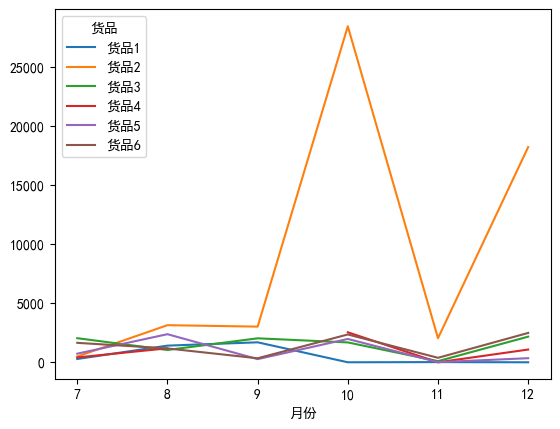

In [29]:
#2.是否存在尚有潜力的销售区域
#（1）月份维度
data1 = data.groupby(['月份','货品'])['数量'].sum().unstack()
data1.plot(kind='line')

#货品2在10、12月销量猛增，原因猜测：公司加大营销力度、公司开发新的市场（后续有结论）

In [30]:
#（2）不同区域
data1 = data.groupby(['销售区域','货品'])['数量'].sum().unstack()
data1

#从销售区域看，货品的销售区域一般为1-3个区域，货品1有3个，货品2有2个，其余货品只有一个区域

货品,货品1,货品2,货品3,货品4,货品5,货品6
销售区域,,,,,,
华东,NaN,53810.0,NaN,NaN,NaN,NaN
华北,2827.0,NaN,9073.5,NaN,NaN,NaN
华南,579.0,NaN,NaN,NaN,NaN,NaN
泰国,NaN,NaN,NaN,NaN,5725.0,NaN
西北,11.0,NaN,NaN,5228.0,NaN,NaN
马来西亚,NaN,1509.0,NaN,NaN,NaN,8394.0


In [34]:
#（3）月份和区域维度
data1 = data.groupby(['月份','销售区域','货品'])['数量'].sum().unstack()
data1['货品2']

#货品2在10月和12月销量猛增原因：主要是发生在原有销售区域（华东）
#在7、8、9、11月份需要加大营销力度，增加销售数量

月份  销售区域
7   华东        489.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚        2.0
8   华东       1640.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚     1502.0
9   华东       3019.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚        1.0
10  华东      28420.0
    华北          NaN
    泰国          NaN
    西北          NaN
    马来西亚        NaN
11  华东       2041.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚        1.0
12  华东      18201.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚        3.0
Name: 货品2, dtype: float64

In [44]:
#商品是否存在质量问题

data['货品用户反馈'] = data['货品用户反馈'].str.strip() #去除首尾空格
data1 = data.groupby(['货品','销售区域'])['货品用户反馈'].value_counts().unstack()
data1['拒货率'] = data1['拒货']/data1.sum(axis=1)
data1['返修率'] = data1['返修']/data1.sum(axis=1)
data1['合格率'] = data1['质量合格']/data1.sum(axis=1)

#data1.sum(axis=1)：对于每个 货品 和 销售区域 组合，统计总的用户反馈数量
data1.sort_values(['合格率','返修率','拒货率'],ascending = False)#按从左到右顺序进行排序

#货品3、5、6合格率较高，返修率较低，表明质量不错
#货品2、4、6合格率较低、返修率较高，表明质量较低
#货品2在马来西亚拒货率最高，同时货品2在马来西亚的按时交货率也很低。猜测马来西亚人对送货时效性要求较高，如果达不到，则往往考虑拒货。
#货品2主要在华东地区销售，可以考虑增大在华东的投入，适当减少在马来西亚的投入。

D:\temp\ipykernel_16116\3544141207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['货品用户反馈'] = data['货品用户反馈'].str.strip() #去除首尾空格


货品用户反馈      拒货   质量合格    返修       拒货率       返修率       合格率
货品  销售区域                                                 
货品3 华北    31.0  188.0  19.0  0.130252  0.079788  0.789219
货品6 马来西亚  56.0  242.0  14.0  0.179487  0.044846  0.775084
货品5 泰国    14.0  142.0  29.0  0.075676  0.156693  0.766605
货品2 华东    71.0  184.0  51.0  0.232026  0.166540  0.600525
货品1 华南     5.0    4.0   2.0  0.454545  0.174603  0.343963
    西北     NaN    1.0   2.0       NaN  0.666667  0.272727
    华北     NaN    3.0  12.0       NaN  0.800000  0.189873
货品4 西北     NaN    9.0  48.0       NaN  0.842105  0.155596
货品2 马来西亚   6.0    1.0   2.0  0.666667  0.206897  0.101281